In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

#Load road shapefile 
road_data = gpd.read_file('./data/nz-roads-road-section-geometry.shx')

# Load the Christchurch ward map shapefile
wellington_boundary  = gpd.read_file('TLA_Boundaries.shx')


road_data.head()

DriverError: TLA_Boundaries.shx: No such file or directory

In [2]:
# Check the CRS of the crash data
#print(crash_data.crs)
print(road_data.crs)
print(wellington_boundary.crs)

None
None


In [3]:
# Assign the NZTM2000 CRS to the crash data
#crash_data.crs = 'EPSG:2193'

# Assign the NZTM2000 CRS to the crash data
road_data.crs = 'EPSG:2193'

# Assign the NZTM2000 CRS to the crash data
wellington_boundary.crs = 'EPSG:2193'

In [4]:
# Check the CRS of the crash data
#print(crash_data.crs)
print(wellington_boundary.crs)
print(road_data.crs)

EPSG:2193
EPSG:2193


In [5]:
# Clip the crash data to the Christchurch wards
#crash_data_wellington = gpd.clip(crash_data, wellington_boundary)

In [6]:
road_data_wellington = gpd.clip(road_data, wellington_boundary)

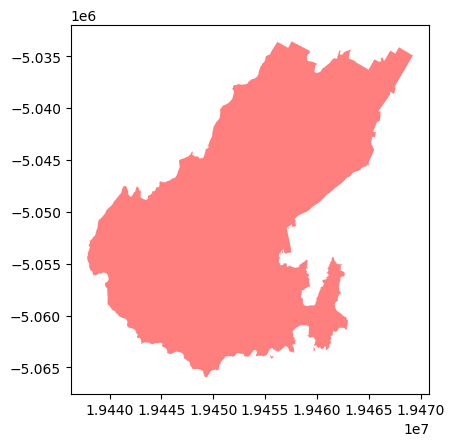

In [7]:
import matplotlib.pyplot as plt

# Plot the Wellington boundary
wellington_boundary.plot(color='red', ax=plt.gca(), alpha=0.5)

plt.show()

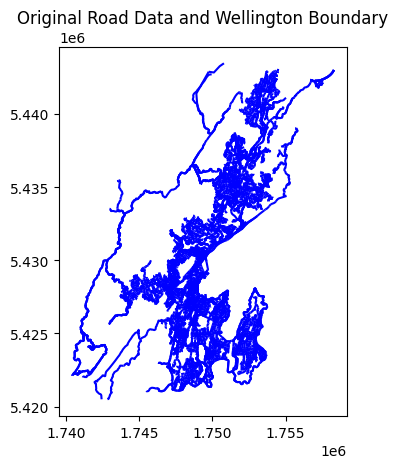

In [8]:
# Plot the original road data
road_data.plot(color='blue', ax=plt.gca())
plt.title('Original Road Data and Wellington Boundary')

plt.show()

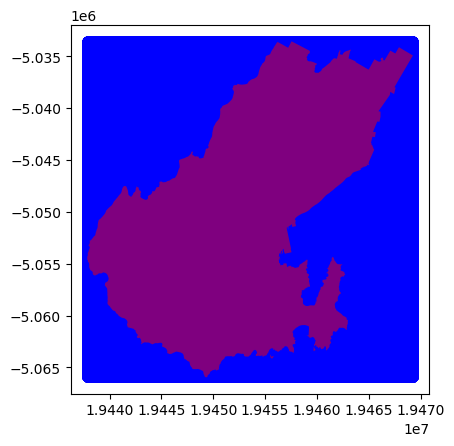

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming wellington_boundary is a GeoPandas GeoDataFrame
min_x, min_y, max_x, max_y = wellington_boundary.total_bounds

# Define the grid size (5x5 meters)
grid_size = 5

# Calculate the number of grid cells in each direction
num_x_cells = int((max_x - min_x) / grid_size)
num_y_cells = int((max_y - min_y) / grid_size)

# Create the grid
x = np.linspace(min_x, max_x, num_x_cells + 1)
y = np.linspace(min_y, max_y, num_y_cells + 1)
xx, yy = np.meshgrid(x, y)

# Plot the grid
plt.scatter(xx.ravel(), yy.ravel(), color='blue', alpha=0.5)
wellington_boundary.plot(color='red', ax=plt.gca(), alpha=0.5)

plt.show()

In [4]:
import pandas as pd

# Load the CSV file
cas_data = pd.read_csv('./data/Crash_Analysis_System_(CAS)_data.csv')

# Print the first few rows of the data
cas_data.head()

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,...,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1.561971e+06,5.176725e+06,66388959,NaN,587702.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
1,1.756263e+06,5.927631e+06,66388960,NaN,507900.0,0.0,NaN,1.0,0.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
2,1.755375e+06,5.912110e+06,66388961,NaN,518701.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
3,1.760027e+06,5.436020e+06,66388962,NaN,569100.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Light rain,Null
4,2.032005e+06,5.708227e+06,66388963,NaN,544002.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,Open,1.0,NaN,NaN,Light rain,Null


In [3]:
# Print the first few rows of the filtered data
cas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853454 entries, 0 to 853453
Data columns (total 72 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   X                          853454 non-null  float64
 1   Y                          853454 non-null  float64
 2   OBJECTID                   853454 non-null  int64  
 3   advisorySpeed              32848 non-null   float64
 4   areaUnitID                 853450 non-null  float64
 5   bicycle                    853449 non-null  float64
 6   bridge                     348975 non-null  float64
 7   bus                        853449 non-null  float64
 8   carStationWagon            853449 non-null  float64
 9   cliffBank                  348975 non-null  float64
 10  crashDirectionDescription  853454 non-null  object 
 11  crashFinancialYear         853454 non-null  object 
 12  crashLocation1             853454 non-null  object 
 13  crashLocation2             85

In [5]:
cas_data['region'].value_counts()

Auckland Region              294961
Waikato Region                91797
Canterbury Region             85376
Wellington Region             82639
Bay of Plenty Region          49287
Manawatū-Whanganui Region     48452
Otago Region                  46193
Northland Region              34910
Hawke's Bay Region            33585
Southland Region              20985
Taranaki Region               19453
Gisborne Region               10235
Marlborough Region             8573
Nelson Region                  8351
Tasman Region                  7898
West Coast Region              7529
Name: region, dtype: int64

In [6]:
well_df = cas_data[(cas_data['region'] == 'Wellington Region')&(cas_data['crashYear'] > 2014)]
well_df.shape

(30464, 72)

In [27]:
import geopandas as gpd
# Load the car crash dataset from the GeoJSON file
geo_gdf = gpd.read_file('./data/Crash_Analysis_System_(CAS)_data.geojson')
# Ensure the CRS matches for both datasets
geo_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
geo_gdf.head()

,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,...,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB,geometry
0,66388962,NaN,569100,0.0,NaN,0.0,2.0,NaN,Null,2017/2018,...,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Light rain,Null,POINT (174.90885 -41.21139)
1,66388964,NaN,571400,0.0,NaN,0.0,2.0,NaN,Null,2018/2019,...,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Light rain,Null,POINT (174.88102 -41.12506)
2,66388986,NaN,575300,0.0,0.0,0.0,1.0,1.0,South,2018/2019,...,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Light rain,Null,POINT (174.75760 -41.28854)
3,66388998,NaN,572600,0.0,0.0,0.0,2.0,0.0,North,2017/2018,...,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,Null,POINT (174.82511 -41.16802)
4,66389034,NaN,577000,0.0,NaN,0.0,1.0,NaN,South,2019/2020,...,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null,POINT (174.81144 -41.32660)


In [30]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the Christchurch ward map shapefile
wellington_boundary  = gpd.read_file('./data/TLA_Boundaries.shp')

# Assign the NZTM2000 CRS to the crash data
print(wellington_boundary.crs)

None


In [32]:
wellington_boundary.crs = 'EPSG:4326'
wellington_boundary.head()

,geometry
0,"MULTIPOLYGON (((19456532.28706 -5053793.05570,..."


In [33]:
crash_within_boundary = geo_gdf[geo_gdf.geometry.intersects(wellington_boundary.unary_union)]
crash_within_boundary.shape

(0, 71)

/Users/ellenyan/opt/anaconda3/envs/jupyter/lib/python3.8/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


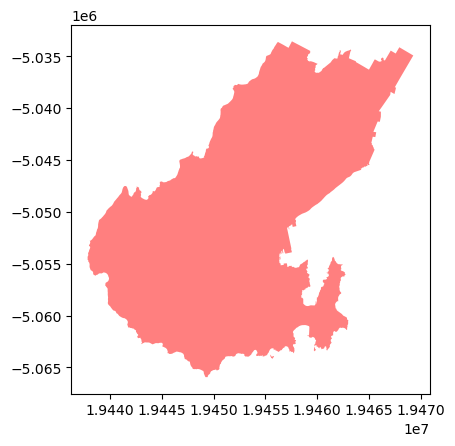

In [11]:
# Plot the Wellington boundary and the filtered crash data
fig, ax = plt.subplots()
wellington_boundary.plot(color='red', ax=ax, alpha=0.5)
crash_within_boundary.plot(ax=ax, color='blue', markersize=5)

plt.show()

In [ ]:
well_df = crash_within_boundary[crash_within_boundary['region'] == 'Wellington Region']
well_df.shape

## Just use car crash data for data distribution

In [25]:
# Create a new column to indicate if the crashYear is during the pandemic
well_df['if_pandemic'] = well_df['crashYear'].apply(lambda x: 1 if x in [2020, 2021] else 0)

# Create a pivot table to count each year by crashSeverity
pivot_table = well_df.pivot_table(index='crashYear', columns='crashSeverity', aggfunc='size', fill_value=0).iloc[-10:,:]
pivot_table

/var/folders/gt/nykzrg6x129dryx71cktw8t00000gn/T/ipykernel_38992/2797038809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_df['if_pandemic'] = well_df['crashYear'].apply(lambda x: 1 if x in [2020, 2021] else 0)


crashSeverity,Fatal Crash,Minor Crash,Non-Injury Crash,Serious Crash
crashYear,,,,
2015,9,579,2200,131
2016,14,658,2780,165
2017,14,771,2954,216
2018,13,824,2793,204
2019,11,874,2607,163
2020,13,679,2399,135
2021,18,738,2520,167
2022,12,704,1894,162
2023,14,739,1785,155


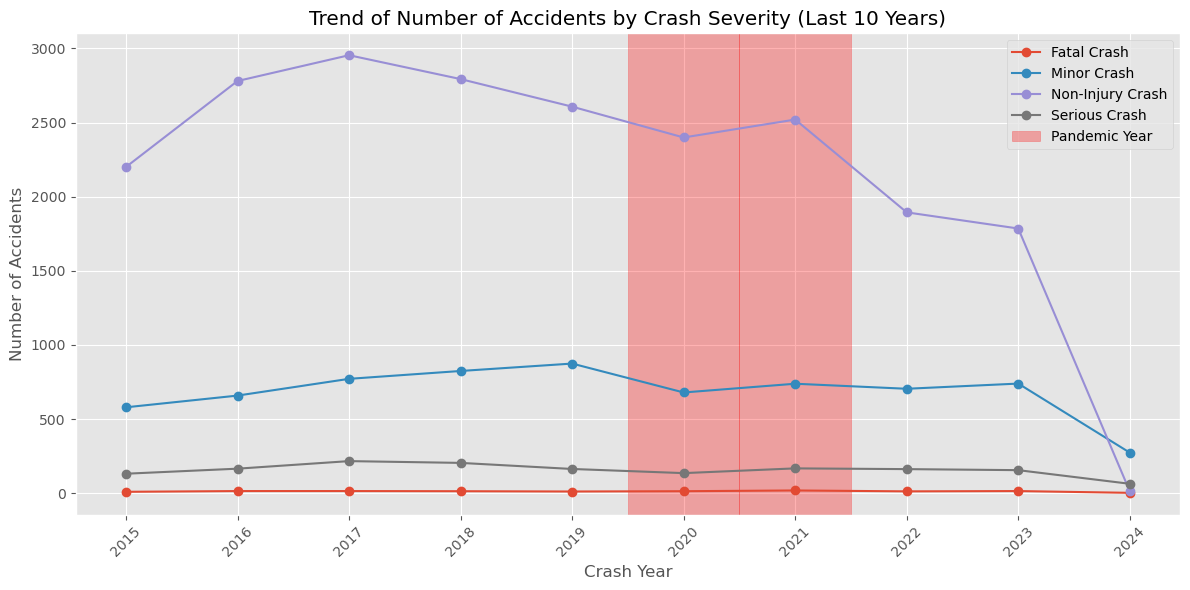

In [26]:
# Plot the trend of the number of accidents in each crashSeverity
plt.figure(figsize=(12, 6))
for severity in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[severity], marker='o', label=severity)

# Highlight the pandemic years
for year in [2020, 2021]:
    plt.axvspan(year - 0.5, year + 0.5, color='red', alpha=0.3, label='Pandemic Year' if year == 2020 else "")

plt.xlabel('Crash Year')
plt.ylabel('Number of Accidents')
plt.title('Trend of Number of Accidents by Crash Severity (Last 10 Years)')
plt.legend()
plt.xticks(pivot_table.index, rotation=45)
plt.tight_layout()
plt.show()

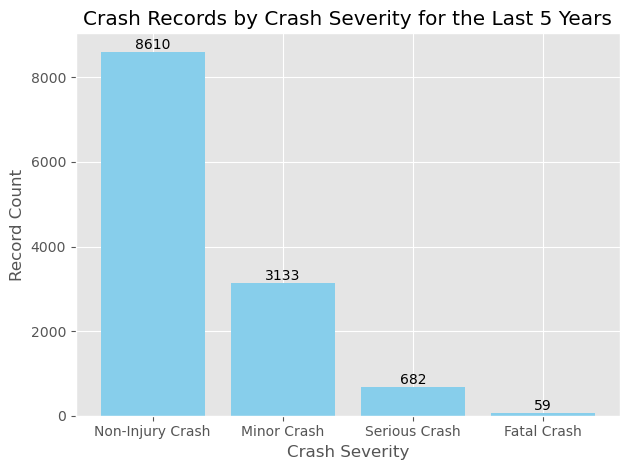

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Get the last 3 years of records
last_5_years = well_df[well_df['crashYear'] >= well_df['crashYear'].max() - 4]

# Sum the records by crashSeverity
severity_sum = last_5_years.groupby('crashSeverity').size().reset_index(name='count')

# Define the desired order of crashSeverity
severity_order = ['Non-Injury Crash', 'Minor Crash', 'Serious Crash', 'Fatal Crash']
severity_sum['crashSeverity'] = pd.Categorical(severity_sum['crashSeverity'], categories=severity_order, ordered=True)
severity_sum = severity_sum.sort_values('crashSeverity')

# Plot a histogram (bar plot) of the summed records
plt.bar(severity_sum['crashSeverity'], severity_sum['count'], color='skyblue')

# Add count numbers on the bars
for index, value in enumerate(severity_sum['count']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Crash Severity')
plt.ylabel('Record Count')
plt.title('Crash Records by Crash Severity for the Last 5 Years')
# plt.xticks(rotation=15)
plt.tight_layout()
plt.show()